<a href="https://colab.research.google.com/github/tlr-id/AMPLab2023/blob/main/trial_face_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_in = '/content/drive/MyDrive/[SMC Thesis] - Lip reading in singing/extract_alberto.mp4'

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 28.0 MB/s eta 0:00:00


In [3]:
#@title **set up**

# install mediapipe
!pip install mediapipe

# clone github code
!git clone https://github.com/cedro3/mediapipe.git
%cd mediapipe/

# initial setting
import mediapipe as mp
mp_holistic = mp.solutions.holistic

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
WHITE_COLOR = (224, 224, 224)
BLACK_COLOR = (0, 0, 0)
RED_COLOR = (0, 0, 255)
GREEN_COLOR = (0, 128, 0)
BLUE_COLOR = (255, 0, 0)
mp_drawing = mp.solutions.drawing_utils 
drawing_face_spec = mp_drawing.DrawingSpec(color=WHITE_COLOR, thickness=1, circle_radius=1)
#drawing_pose_spec = mp_drawing.DrawingSpec(color=WHITE_COLOR, thickness=3, circle_radius=3)
#drawing_hand_spec = mp_drawing.DrawingSpec(color=WHITE_COLOR, thickness=3, circle_radius=3)
#drawing_dot_spec = mp_drawing.DrawingSpec(color=RED_COLOR, thickness=2, circle_radius=3)

# define fuction
from function import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 42.2 MB/s eta 0:00:00
Cloning into 'mediapipe'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 162 (delta 62), reused 49 (delta 49), pack-reused 84
Receiving objects: 100% (162/162), 2.40 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/mediapipe


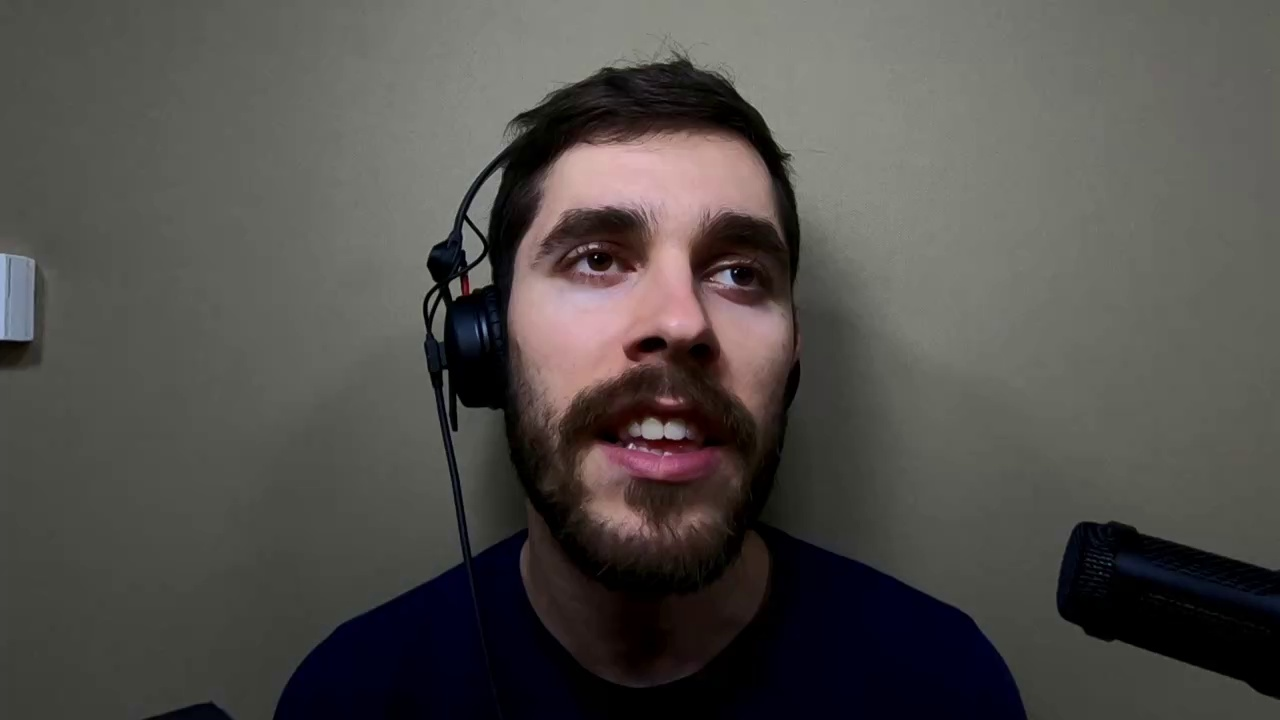

fps =  59.94005994005994
frames =  599
interval =  1


In [12]:
video = 'extract_alberto_sound.mp4'
video_file = 'video/'+video
image_dir='frames/'
image_file='%s.jpg'
 
# video_2_images
reset_folder('frames')
fps, i, interval = video_2_images(video_file, image_dir, image_file)
 
# display strat frame
from google.colab.patches import cv2_imshow
img = cv2.imread('frames/000000.jpg')
cv2_imshow(img)
 
# display parameter
print('fps = ', fps)
print('frames = ', i)
print('interval = ', interval)

In [13]:
#@title **MediaPipe from frames to images**

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob
from tqdm import tqdm ###

# reset images folder
reset_folder('images')

# image file names to files in list format
files=[]
for name in sorted(glob.glob('./frames/*.jpg')):
    files.append(name)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in files}

#for name, image in images.items():
for name, image in tqdm(images.items()):  
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  
  # We have the results here
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #print()
  #print(results.face_landmarks.landmark[1])

  # Draw pose landmarks.
  annotated_image = image.copy()

  FRAME_WIDTH = 1280
  FRAME_HEIGHT = 720

  # pt1 = (int(detection_result.face_landmarks[0][46].x*FRAME_WIDTH),int(detection_result.face_landmarks[0][46].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][46].z)
  # pt2 = (int(detection_result.face_landmarks[0][31].x*FRAME_WIDTH),int(detection_result.face_landmarks[0][31].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][81].z)
  # pt3 = (int(detection_result.face_landmarks[0][261].x*FRAME_WIDTH),int(detection_result.face_landmarks[0][261].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][81].z)
  # pt4 = (int(detection_result.face_landmarks[0][276].x*FRAME_WIDTH),int(detection_result.face_landmarks[0][276].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][46].z)

  pt1 = (int(results.face_landmarks.landmark[68].x*FRAME_WIDTH),int(results.face_landmarks.landmark[68].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][46].z)
  pt2 = (int(results.face_landmarks.landmark[298].x*FRAME_WIDTH),int(results.face_landmarks.landmark[298].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][81].z)
  pt3 = (int(results.face_landmarks.landmark[447].x*FRAME_WIDTH),int(results.face_landmarks.landmark[447].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][81].z)
  pt4 = (int(results.face_landmarks.landmark[197].x*FRAME_WIDTH),int(results.face_landmarks.landmark[197].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][46].z)
  pt5 = (int(results.face_landmarks.landmark[227].x*FRAME_WIDTH),int(results.face_landmarks.landmark[227].y*FRAME_HEIGHT))#,detection_result.face_landmarks[0][46].z)
  pts = [pt1, pt2, pt3, pt4, pt5]

  #pt3 = (detection_result.face_landmarks[0][276].x,detection_result.face_landmarks[0][276].y,detection_result.face_landmarks[0][276].z)
  #pt4 = (detection_result.face_landmarks[0][261].x,detection_result.face_landmarks[0][261].y,detection_result.face_landmarks[0][261].z)
  #print(pt1)
  #print(pt2)
  #pts = [(50, 50), (300, 190), (400, 10)]
  #cv.fillPoly(img, np.array([pts]), RED)
  #pts = [pt1, pt2, pt3, pt4, pt5]

  #annotated_image = cv2.rectangle(annotated_image, pt1, pt2, (0,0,0),  10)

  annotated_image = cv2.fillPoly(annotated_image, np.array([pts]), (0,0,0))

  mp_drawing.draw_landmarks(
      image=annotated_image, 
      landmark_list=results.face_landmarks, 
      connections=mp_holistic.FACEMESH_TESSELATION,  ###
      landmark_drawing_spec=None,
      connection_drawing_spec=drawing_face_spec)
  
  
  

    #   solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp.solutions.drawing_styles
    #     .get_default_face_mesh_tesselation_style())
    # solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp.solutions.drawing_styles
    #     .get_default_face_mesh_contours_style())
    # solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_IRISES,
    #       landmark_drawing_spec=None,
    #       connection_drawing_spec=mp.solutions.drawing_styles
    #       .get_default_face_mesh_iris_connections_style())
    
  #mp_drawing.draw_landmarks(
  #    image=annotated_image, 
  #    landmark_list=results.pose_landmarks, 
  #    connections=mp_holistic.POSE_CONNECTIONS,
  #    landmark_drawing_spec=drawing_pose_spec,
  #    connection_drawing_spec=drawing_pose_spec)
  
  save_name = 'images/'+os.path.basename(name) ###
  cv2.imwrite(save_name, annotated_image)  

100%|██████████| 599/599 [01:21<00:00,  7.37it/s]


In [1]:
!pwd

/content


In [14]:
#@title **make movie from images**
#@markdown　check with_sound if the video has sound
with_sound = True #@param {type:"boolean"}
fps_r = fps/interval

print('making movie...')
if with_sound ==  True:  
  ! ffmpeg -y -r $fps_r -i images/%6d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4
  # audio extraction/addition
  print('preparation for sound...')
  ! ffmpeg -y -i $video_file -loglevel error sound.mp3
  ! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4
else:
  ! ffmpeg -y -r $fps_r -i images/%6d.jpg -vcodec libx264 -pix_fmt yuv420p -loglevel error output.mp4

display_mp4('output.mp4')

making movie...
preparation for sound...


In [15]:
#@title **download movie** (chrome)
from google.colab import files
files.download('output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>